#Air quality up to 2022

#This database was release in April 2022 (5th edition) and the years of measurement range mostly from 2010 to 2019.

#The WHO air quality database compiles data on ground measurements of annual mean concentrations of nitrogen dioxide (NO2), particulate matter of a diameter equal or smaller than 10 μm (PM10) or equal or smaller than 2.5 μm (PM2.5) which aim at representing an average for the city or town as a whole, rather than for individual stations. Both groups of pollutants originate mainly from human activities related to fossil fuel combustion.

#The 2022 update (Fifth Version) database was released in April 2022 and hosts data on air quality for over 600 human settlements in more than 100 countries.


##Pnemonia RSV deaths CDC Data from countires and terrotories worlwide a range of years from 1990-2019 all documented deaths from Pnemonia and RSV

In [ ]:
import pandas as pd



# Read deaths data from the first CSV file
deaths_df = pd.read_csv("Pnemonia_RSV_Infant.csv")

# Read the Excel file into a DataFrame
df_Air = pd.read_csv('WHOairquality2022.csv')

# Now, you can work with the DataFrame (df)
# For example, you can print the first few rows
print(df_Air.head())



                     WHO Region ISO3      Country City or Locality  \
0  Eastern Mediterranean Region  AFG  Afghanistan            Kabul   
1               European Region  ALB      Albania           Durres   
2               European Region  ALB      Albania           Durres   
3               European Region  ALB      Albania          Elbasan   
4               European Region  ALB      Albania          Elbasan   

   Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
0              2019         119.77           NaN          NaN   
1              2015            NaN         17.65        26.63   
2              2016          14.32         24.56        24.78   
3              2015            NaN           NaN        23.96   
4              2016            NaN           NaN        26.26   

   PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
0                        18.0                         NaN   
1                         NaN                         NaN   
2    

In [ ]:
# Perform the merge
merged_data = pd.merge(df_Air, deaths_df, left_on=["Measurement Year", "Country"], right_on=["Year", "Country"])
print(merged_data.head())




                     WHO Region ISO3      Country City or Locality  \
0  Eastern Mediterranean Region  AFG  Afghanistan            Kabul   
1               European Region  ALB      Albania           Durres   
2               European Region  ALB      Albania          Elbasan   
3               European Region  ALB      Albania            Korce   
4               European Region  ALB      Albania            Vlore   

   Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
0              2019         119.77           NaN          NaN   
1              2015            NaN         17.65        26.63   
2              2015            NaN           NaN        23.96   
3              2015          30.34         45.31          NaN   
4              2015            NaN         19.39        14.18   

   PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
0                        18.0                         NaN   
1                         NaN                         NaN   
2    

In [ ]:
print(merged_data.columns)

Index(['WHO Region', 'ISO3', 'Country', 'City or Locality', 'Measurement Year',
       'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database',
       'Status', 'Code', 'Year',
       'Deaths - Lower respiratory infections- Age: Under 5'],
      dtype='object')


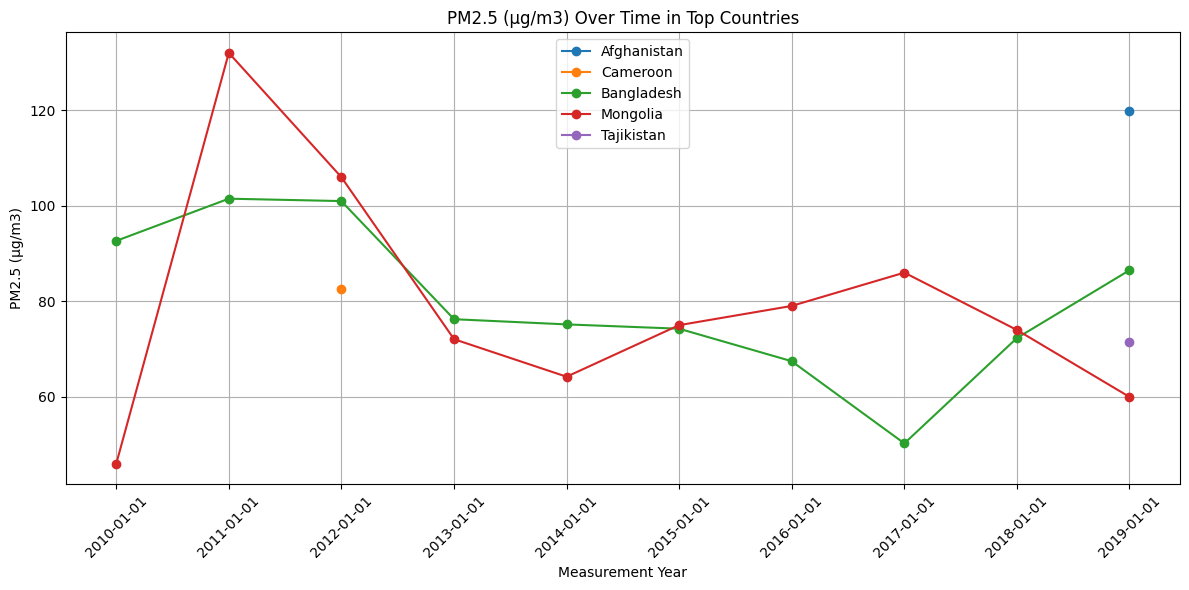

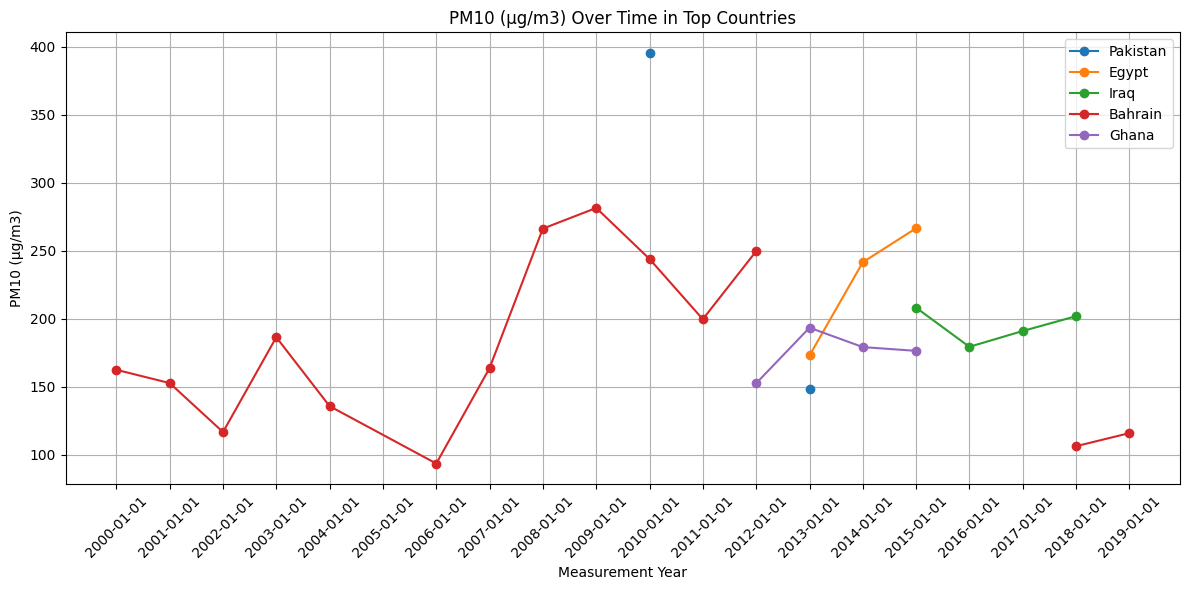

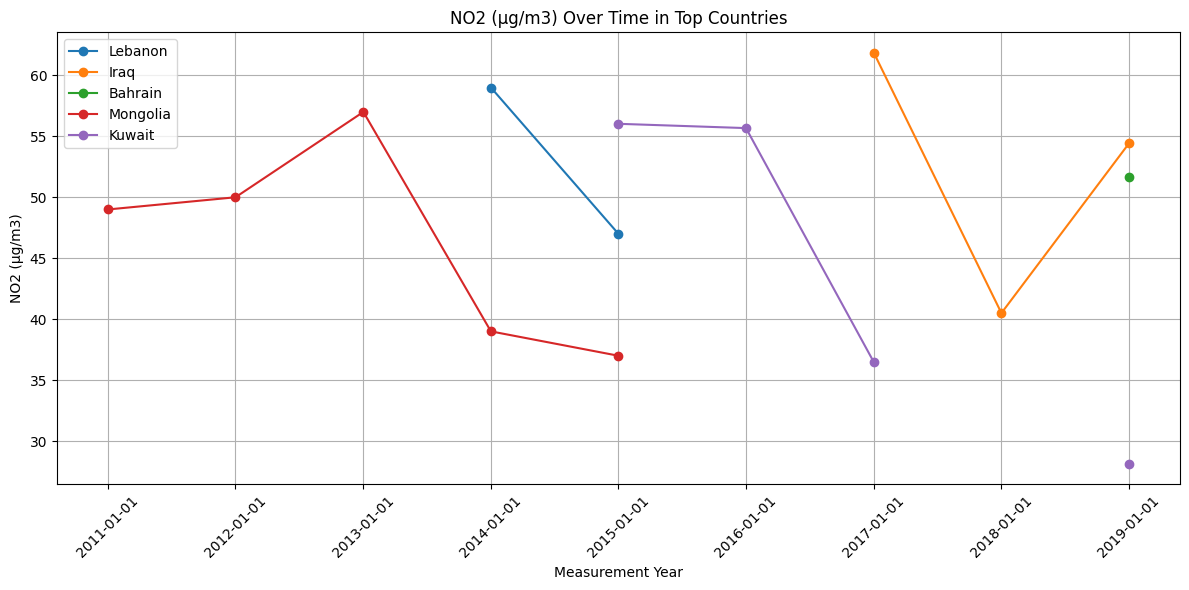

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'Measurement Year' column to datetime if it's not already
merged_data['Measurement Year'] = pd.to_datetime(merged_data['Measurement Year'], format='%Y')

# Define pollutants of interest
pollutants = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']

# Create separate plots for each pollutant
for pollutant in pollutants:
    # Group data by country and measurement year and calculate the mean pollutant value
    grouped = merged_data.groupby(['Country', 'Measurement Year'])[pollutant].mean().reset_index()

    # Find the top countries with the highest pollutant values
    top_countries = grouped.groupby('Country')[pollutant].mean().nlargest(5).index

    # Filter the data for the top countries
    filtered_data = grouped[grouped['Country'].isin(top_countries)]

    # Create a separate plot for each top country
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

    for country in top_countries:
        country_data = filtered_data[filtered_data['Country'] == country]
        plt.plot(country_data['Measurement Year'], country_data[pollutant], marker='o', label=country)

    plt.title(f'{pollutant} Over Time in Top Countries')
    plt.xlabel('Measurement Year')
    plt.ylabel(f'{pollutant}')
    plt.legend()
    plt.grid(True)

    # Optionally, customize the date format on the x-axis if needed
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())  # Show year intervals

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()


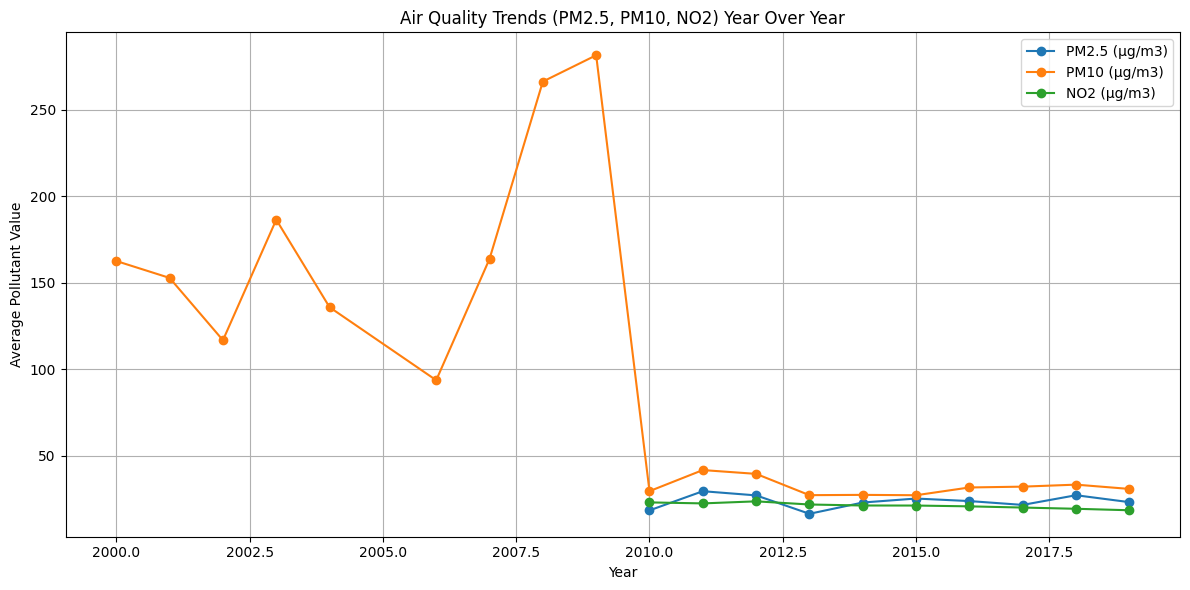

In [ ]:


# Convert 'Measurement Year' column to datetime if it's not already
merged_data['Measurement Year'] = pd.to_datetime(merged_data['Measurement Year'], format='%Y')

# Define pollutants of interest
pollutants = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']

# Create a separate plot for each pollutant
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

for pollutant in pollutants:
    # Group data by year and calculate the mean pollutant value for each year
    yearly_mean = merged_data.groupby(merged_data['Measurement Year'].dt.year)[pollutant].mean()

    # Create a line plot for the pollutant trend year over year
    plt.plot(yearly_mean.index, yearly_mean.values, marker='o', label=pollutant)

plt.title('Air Quality Trends (PM2.5, PM10, NO2) Year Over Year')
plt.xlabel('Year')
plt.ylabel('Average Pollutant Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


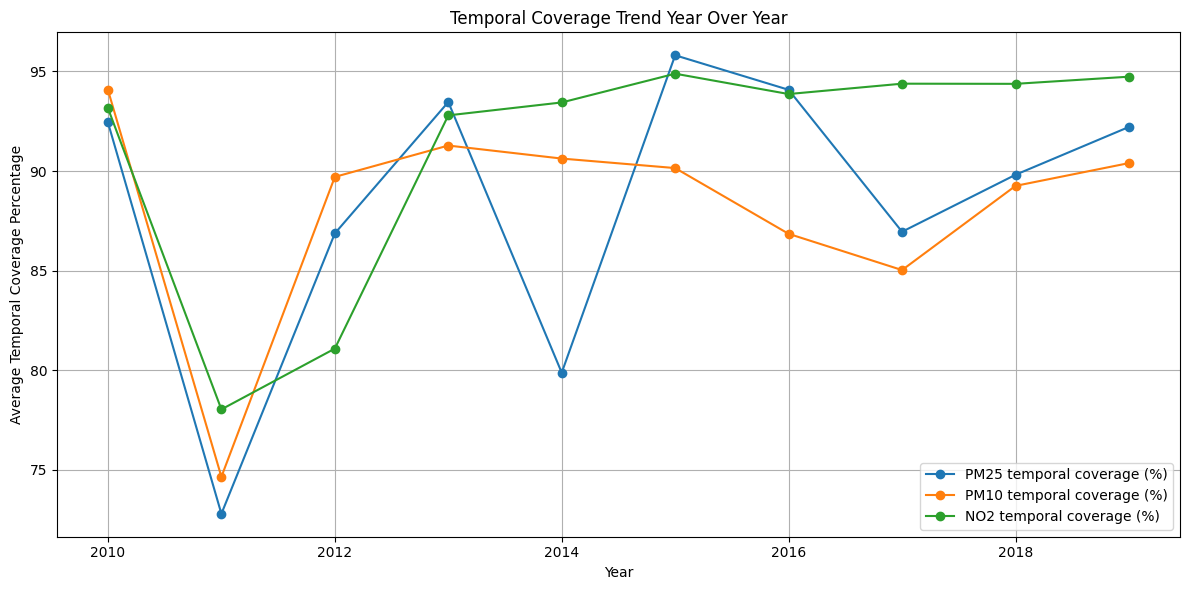

In [ ]:


# Convert 'Measurement Year' column to datetime if it's not already
merged_data['Measurement Year'] = pd.to_datetime(merged_data['Measurement Year'], format='%Y')

# Define columns for temporal coverage percentages
coverage_columns = ['PM25 temporal coverage (%)', 'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)']

# Create a separate plot for each coverage column
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

for column in coverage_columns:
    # Group data by year and calculate the average temporal coverage percentage for each year
    yearly_coverage = merged_data.groupby(merged_data['Measurement Year'].dt.year)[column].mean()

    # Create a line plot for the temporal coverage trend year over year
    plt.plot(yearly_coverage.index, yearly_coverage.values, marker='o', label=column)

plt.title('Temporal Coverage Trend Year Over Year')
plt.xlabel('Year')
plt.ylabel('Average Temporal Coverage Percentage')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer  # Import SimpleImputer for imputing missing values


# Extract the year from the 'Measurement Year' column
df_Air['Year'] = df['Measurement Year'].dt.year

# Select relevant features and target variable
X = df_Air[['Year', 'WHO Region', 'City or Locality']]
y = df_Air['PM2.5 (μg/m3)']

# One-hot encode categorical variables like 'WHO Region' and 'City or Locality'
X_encoded = pd.get_dummies(X, columns=['WHO Region', 'City or Locality'], drop_first=True)

# Impute missing values in the target variable (y) with the mean value
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.values.reshape(-1, 1))  # Reshape to 2D array

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (e.g., using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 4.6708328970615527e+21


<ipython-input-30-17c53e432e21>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


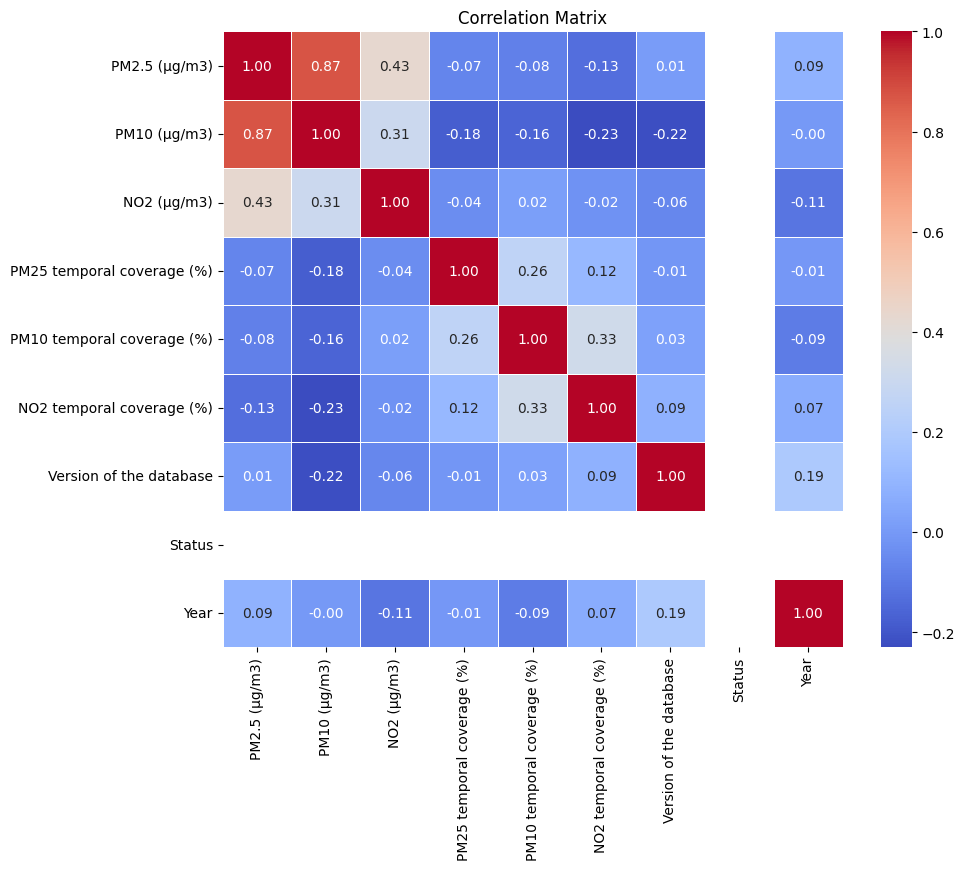

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate correlations and create a correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer


# Define columns with missing values
columns_with_missing = ['PM25 temporal coverage (%)', 'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)']

# Create an imputer with a strategy (e.g., mean, median, mode)
imputer = SimpleImputer(strategy='mean')

# Impute missing values in selected columns
df[columns_with_missing] = imputer.fit_transform(df[columns_with_missing])


In [ ]:
print(merged_data.head())

In [ ]:
print(merged_data)

                         WHO Region ISO3       Country City or Locality  \
0      Eastern Mediterranean Region  AFG   Afghanistan            Kabul   
1                   European Region  ALB       Albania           Durres   
2                   European Region  ALB       Albania          Elbasan   
3                   European Region  ALB       Albania            Korce   
4                   European Region  ALB       Albania            Vlore   
...                             ...  ...           ...              ...   
29828                African Region  ZAF  South Africa         Nkangala   
29829                African Region  ZAF  South Africa         Sedibeng   
29830                African Region  ZAF  South Africa        Uthungulu   
29831                African Region  ZAF  South Africa        Waterberg   
29832                African Region  ZAF  South Africa       West Coast   

       Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
0                  2019       

In [ ]:
# Filter the data for the desired columns and condition
filtered_df = df.loc[(df['WHO Region'] == 'Eastern Mediterranean Region') &
                     (df['ISO3'] == 'AFG') &
                     (df['Country'] == 'Afghanistan') &
                     (df['City or Locality'] == 'Kabul') &
                     (df['Measurement Year'] == 2019) &
                     (df['Number and type of monitoring stations'].notna()),
                     ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']]

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Remove rows with missing values
merged_data_cleaned = merged_data.dropna(subset=['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)'])

# Perform regression analysis
X = merged_data_cleaned[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']]
y = merged_data_cleaned['Deaths - Lower respiratory infections- Age: Under 5']

X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()  # Fit the model
predictions = model.predict(X)

# Print regression results
print(model.summary())


                                             OLS Regression Results                                            
Dep. Variable:     Deaths - Lower respiratory infections- Age: Under 5   R-squared:                       0.463
Model:                                                             OLS   Adj. R-squared:                  0.463
Method:                                                  Least Squares   F-statistic:                     2026.
Date:                                                 Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                                                         15:57:57   Log-Likelihood:                -81147.
No. Observations:                                                 7048   AIC:                         1.623e+05
Df Residuals:                                                     7044   BIC:                         1.623e+05
Df Model:                                                            3                                  

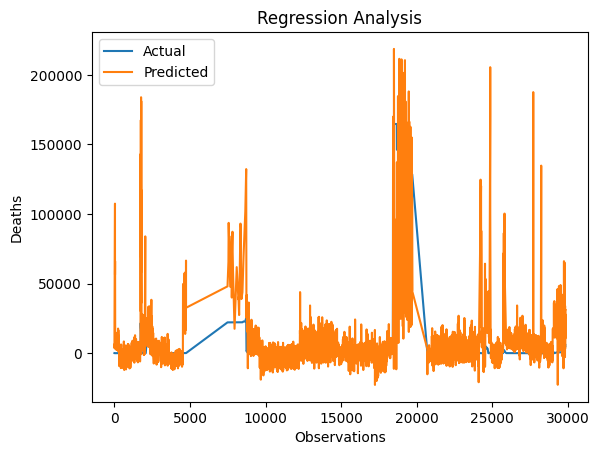

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Remove rows with missing values
merged_data_cleaned = merged_data.dropna(subset=['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)'])

# Perform regression analysis
X = merged_data_cleaned[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']]
y = merged_data_cleaned['Deaths - Lower respiratory infections- Age: Under 5']

X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()  # Fit the model
predictions = model.predict(X)

# Plot the actual values and predicted values
plt.plot(y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Pollutants')
plt.ylabel('Deaths')
plt.title('Regression Analysis')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Filter data for United States
df_us = merged_data[merged_data["Country"] == "United States"]



# Perform regression analysis
X = merged_data_cleaned[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']]
y = merged_data_cleaned['Deaths - Lower respiratory infections - Sex: Both - Age: Under 5']

X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()  # Fit the model
predictions = model.predict(X)

# Plot the actual values and predicted values
plt.plot(y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Observations')
plt.ylabel('Deaths')
plt.title('Regression Analysis (United States)')
plt.legend()
plt.show()


NameError: ignored

In [ ]:
import pandas as pd

# Filter data for African countries
african_countries = ["Eastern Mediterranean Region", "African Region", "South-East Asia Region"]

# Filter rows based on WHO Region column
df_africa = df[df["WHO Region"].isin(african_countries)]

print(df_africa.head())

In [ ]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
# Filter data for African countries
african_countries = ["Eastern Mediterranean Region", "African Region", "South-East Asia Region"]
df_africa = df_Air[df_Air["WHO Region"].isin(african_countries)]
# Drop rows with missing values
df_africa = df_africa.dropna()
# Perform linear regression
X = df_africa[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']]
y = deaths_df['Deaths - Lower respiratory infections - Sex: Both - Age: Under 5']
X = sm.add_constant(X)
print("Shape of X:", X.shape)  # Add this line to check the shape of X
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# Print regression results
print(model.summary())

KeyError: ignored

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Filter data for United States
df_us = merged_data[merged_data["Country"] == "United States"]

df_us.dropna()
# Perform linear regression
X = df_us[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']]
y = df_us['Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print regression results
print(model.summary())


ValueError: ignored

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv("Pnemonia_RSV_Infant.csv")

# Filter the data for Africa and the US
filtered_data = data[data['Country'].isin(['Africa', 'US'])]

# Group the data by country and calculate the average air quality and deaths under 5
grouped_data = filtered_data.groupby("Country").mean()[["pollutants", "merged_data_cleaned"]]

# Print the grouped data
print(grouped_data)

# Perform linear regression plot
sns.regplot(x="pollutants", y="merged_data_cleaned", data=filtered_data)

# Show the plot
plt.show()


<ipython-input-48-e0e3612a18e3>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = filtered_data.groupby("Country").mean()[["pollutants", "merged_data_cleaned"]]


KeyError: ignored

In [ ]:
print(merged_data)

                         WHO Region ISO3       Country City or Locality  \
0      Eastern Mediterranean Region  AFG   Afghanistan            Kabul   
1                   European Region  ALB       Albania           Durres   
2                   European Region  ALB       Albania          Elbasan   
3                   European Region  ALB       Albania            Korce   
4                   European Region  ALB       Albania            Vlore   
...                             ...  ...           ...              ...   
29828                African Region  ZAF  South Africa         Nkangala   
29829                African Region  ZAF  South Africa         Sedibeng   
29830                African Region  ZAF  South Africa        Uthungulu   
29831                African Region  ZAF  South Africa        Waterberg   
29832                African Region  ZAF  South Africa       West Coast   

      Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
0           2019-01-01         

AttributeError: ignored

In [ ]:
print(bakersfield_data)


Empty DataFrame
Columns: [WHO Region, ISO3, Country, City or Locality, Measurement Year, PM2.5 (μg/m3), PM10 (μg/m3), NO2 (μg/m3), PM25 temporal coverage (%), PM10 temporal coverage (%), NO2 temporal coverage (%), Reference, Number and type of monitoring stations, Version of the database, Status, Code, Year, Deaths - Lower respiratory infections- Age: Under 5]
Index: []


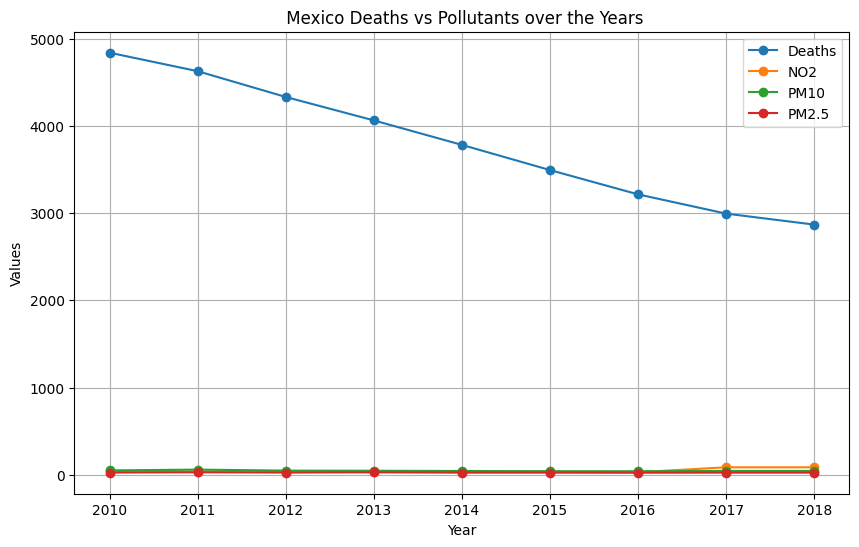

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017 ,2018],
    'Deaths':[4843, 4631, 4335, 4066, 3785, 3496, 3217, 2996, 2870],
    'NO2': [36.55, 35, 32.36, 29.56, 29.91, 28.07, 27.86, 83.94, 83.94],
    'PM10': [48.25, 57.25, 45.87, 44.37, 41.71, 39.35, 38.72, 42.5, 42.5 ],
    'PM2.5': [23.6, 26.68, 23.44, 26.17, 22.93, 23.06, 21.73, 22.7, 22.7 ]
}

air_quality_data = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Plot Deaths
plt.plot(air_quality_data['Year'], air_quality_data['Deaths'], marker='o', label='Deaths')

# Plot Pollutants
plt.plot(air_quality_data['Year'], air_quality_data['NO2'], marker='o', label='NO2')
plt.plot(air_quality_data['Year'], air_quality_data['PM10'], marker='o', label='PM10')
plt.plot(air_quality_data['Year'], air_quality_data['PM2.5'], marker='o', label='PM2.5')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Values')
plt.title(' Mexico Deaths vs Pollutants over the Years')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     7.950
Date:                Wed, 15 Nov 2023   Prob (F-statistic):             0.0238
Time:                        15:07:56   Log-Likelihood:                -63.492
No. Observations:                   9   AIC:                             135.0
Df Residuals:                       5   BIC:                             135.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1422.1356   2229.915      0.638      0.5

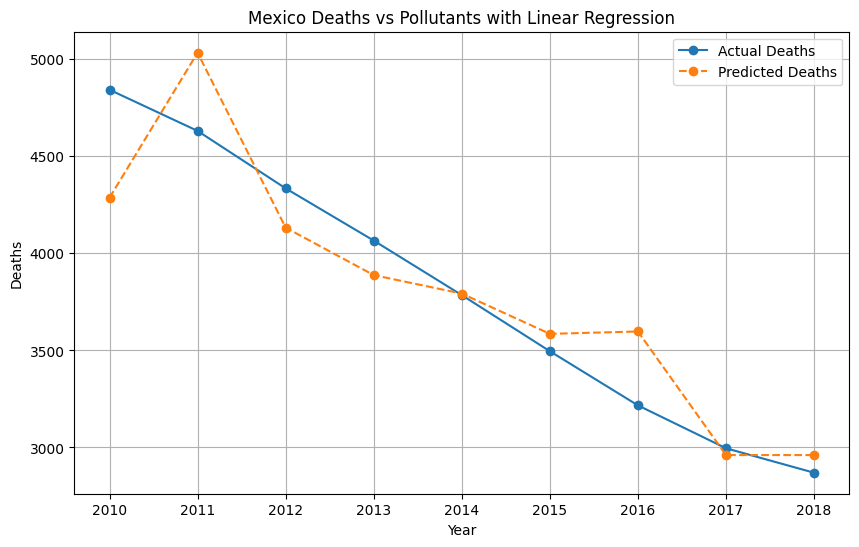

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
    'Deaths': [4843, 4631, 4335, 4066, 3785, 3496, 3217, 2996, 2870],
    'NO2': [36.55, 35, 32.36, 29.56, 29.91, 28.07, 27.86, 83.94, 83.94],
    'PM10': [48.25, 57.25, 45.87, 44.37, 41.71, 39.35, 38.72, 42.5, 42.5],
    'PM2.5': [23.6, 26.68, 23.44, 26.17, 22.93, 23.06, 21.73, 22.7, 22.7]
}

air_quality_data = pd.DataFrame(data)

# Perform linear regression
X = air_quality_data[['NO2', 'PM10', 'PM2.5']]
y = air_quality_data['Deaths']
X = sm.add_constant(X)  # Add intercept

model = sm.OLS(y, X).fit()  # Fit the model
predictions = model.predict(X)

# Display the regression results
print(model.summary())

# Plotting
plt.figure(figsize=(10, 6))

# Plot Deaths
plt.plot(air_quality_data['Year'], air_quality_data['Deaths'], marker='o', label='Actual Deaths')

# Plot Predicted Deaths from the linear regression model
plt.plot(air_quality_data['Year'], predictions, marker='o', linestyle='dashed', label='Predicted Deaths')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Mexico Deaths vs Pollutants with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


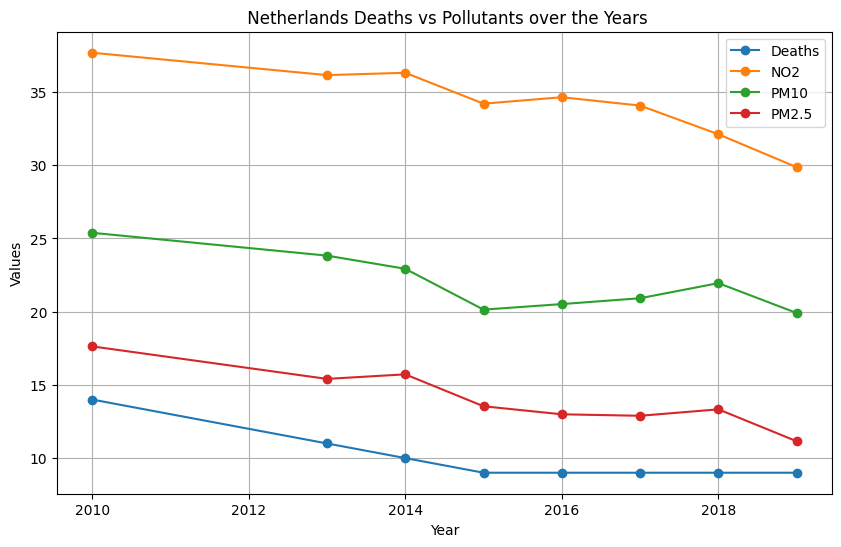

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Year': [2010, 2013, 2014, 2015, 2016, 2017 ,2018, 2019],
    'Deaths':[14, 11, 10, 9, 9, 9, 9, 9],  # Replace None with actual values
    'NO2': [37.69, 36.16, 36.32, 34.21, 34.65, 34.08, 32.12, 29.87],
    'PM10': [25.39, 23.83, 22.93, 20.14, 20.52, 20.92, 21.95, 19.91],
    'PM2.5': [17.63, 15.41, 15.72, 13.54, 12.99, 12.89, 13.33, 11.15]
}

air_quality_data = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Plot Deaths
plt.plot(air_quality_data['Year'], air_quality_data['Deaths'], marker='o', label='Deaths')

# Plot Pollutants
plt.plot(air_quality_data['Year'], air_quality_data['NO2'], marker='o', label='NO2')
plt.plot(air_quality_data['Year'], air_quality_data['PM10'], marker='o', label='PM10')
plt.plot(air_quality_data['Year'], air_quality_data['PM2.5'], marker='o', label='PM2.5')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Values')
plt.title(' Netherlands Deaths vs Pollutants over the Years')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     6.312
Date:                Wed, 15 Nov 2023   Prob (F-statistic):             0.0536
Time:                        15:25:35   Log-Likelihood:                -8.4124
No. Observations:                   8   AIC:                             24.82
Df Residuals:                       4   BIC:                             25.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0573     12.662     -0.241      0.8

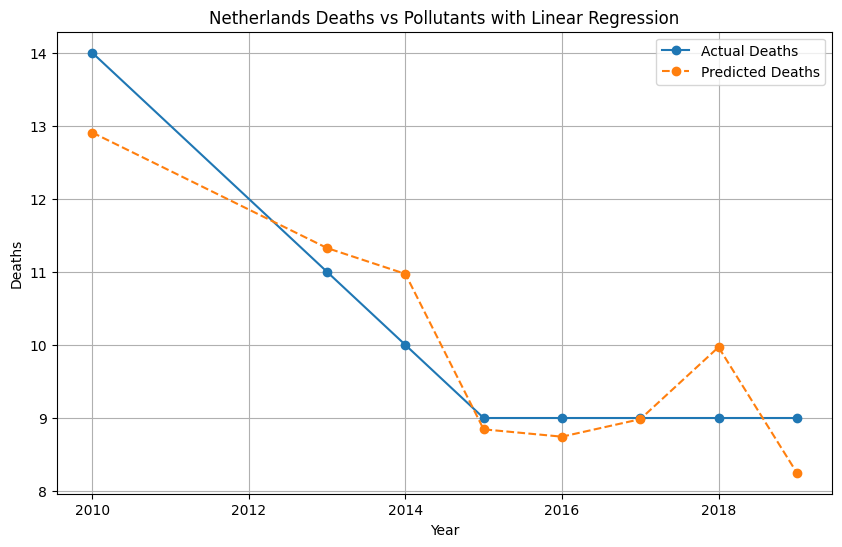

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


data = {
    'Year': [2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'Deaths': [14, 11, 10, 9, 9, 9, 9, 9],
    'NO2': [37.69, 36.16, 36.32, 34.21, 34.65, 34.08, 32.12, 29.87],
    'PM10': [25.39, 23.83, 22.93, 20.14, 20.52, 20.92, 21.95, 19.91],
    'PM2.5': [17.63, 15.41, 15.72, 13.54, 12.99, 12.89, 13.33, 11.15]
}

air_quality_data = pd.DataFrame(data)

# Perform linear regression
X = air_quality_data[['NO2', 'PM10', 'PM2.5']]
y = air_quality_data['Deaths']
X = sm.add_constant(X)  # Add intercept

model = sm.OLS(y, X).fit()  # Fit the model
predictions = model.predict(X)

# Display the regression results
print(model.summary())

# Plotting
plt.figure(figsize=(10, 6))

# Plot Deaths
plt.plot(air_quality_data['Year'], air_quality_data['Deaths'], marker='o', label='Actual Deaths')

# Plot Predicted Deaths from the linear regression model
plt.plot(air_quality_data['Year'], predictions, marker='o', linestyle='dashed', label='Predicted Deaths')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Netherlands Deaths vs Pollutants with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


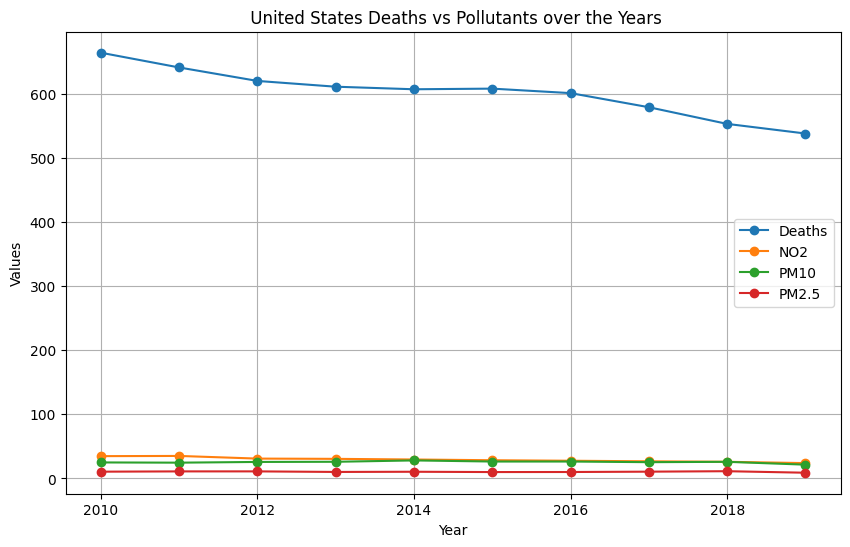

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Sample Data (Replace this with your actual DataFrame)
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017 ,2018, 2019],
    'Deaths':[664, 641, 620, 611, 607, 608, 601, 579, 553, 538 ],  # Replace None with actual values
    'NO2': [34.85, 35.16, 31.02, 30.62, 29.61, 28.47, 27.67, 26.81, 26.03, 23.99 ],
    'PM10': [25.03, 24.68, 25.8, 26.05, 28.18, 26.44, 26.44, 25.44, 25.99, 21.57 ],
    'PM2.5': [10.62, 11.06, 11.08, 10.2, 10.5, 10.02, 10.11, 10.64, 11.36, 8.99 ]
}

air_quality_data = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Plot Deaths
plt.plot(air_quality_data['Year'], air_quality_data['Deaths'], marker='o', label='Deaths')

# Plot Pollutants
plt.plot(air_quality_data['Year'], air_quality_data['NO2'], marker='o', label='NO2')
plt.plot(air_quality_data['Year'], air_quality_data['PM10'], marker='o', label='PM10')
plt.plot(air_quality_data['Year'], air_quality_data['PM2.5'], marker='o', label='PM2.5')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Values')
plt.title(' United States Deaths vs Pollutants over the Years')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     38.95
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           0.000250
Time:                        15:48:04   Log-Likelihood:                -34.888
No. Observations:                  10   AIC:                             77.78
Df Residuals:                       6   BIC:                             78.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        287.4736     60.459      4.755      0.0

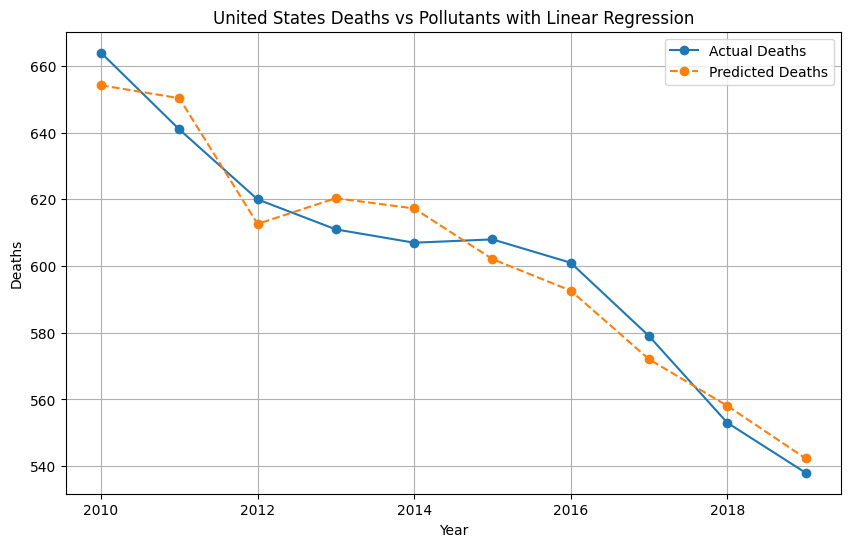

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Sample Data
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'Deaths': [664, 641, 620, 611, 607, 608, 601, 579, 553, 538],
    'NO2': [34.85, 35.16, 31.02, 30.62, 29.61, 28.47, 27.67, 26.81, 26.03, 23.99],
    'PM10': [25.03, 24.68, 25.8, 26.05, 28.18, 26.44, 26.44, 25.44, 25.99, 21.57],
    'PM2.5': [10.62, 11.06, 11.08, 10.2, 10.5, 10.02, 10.11, 10.64, 11.36, 8.99]
}

air_quality_data = pd.DataFrame(data)

# Perform linear regression
X = air_quality_data[['NO2', 'PM10', 'PM2.5']]
y = air_quality_data['Deaths']
X = sm.add_constant(X)  # Add intercept

model = sm.OLS(y, X).fit()  # Fit the model
predictions = model.predict(X)

# Display the regression results
print(model.summary())

# Plotting
plt.figure(figsize=(10, 6))

# Plot Deaths
plt.plot(air_quality_data['Year'], air_quality_data['Deaths'], marker='o', label='Actual Deaths')

# Plot Predicted Deaths from the linear regression model
plt.plot(air_quality_data['Year'], predictions, marker='o', linestyle='dashed', label='Predicted Deaths')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('United States Deaths vs Pollutants with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Nov 2023   Prob (F-statistic):                nan
Time:                        16:13:21   Log-Likelihood:                 81.366
No. Observations:                   4   AIC:                            -154.7
Df Residuals:                       0   BIC:                            -157.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.659e+05        inf          0        n

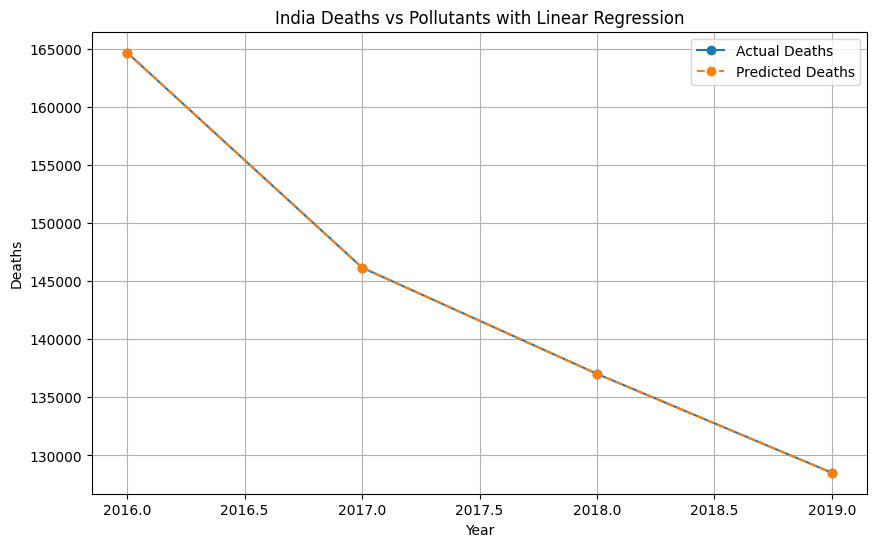

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


data = {
    'Year': [2016, 2017, 2018, 2019],
    'Deaths': [164659, 146165, 137024, 128512],
    'NO2': [66.89, 67.56, 73.67, 70.56],
    'PM10': [276.11, 240.44, 224.67, 198.78 ],
    'PM2.5': [115.43, 101.33, 121, 105 ]
}

air_quality_data = pd.DataFrame(data)

# Perform linear regression
X = air_quality_data[['NO2', 'PM10', 'PM2.5']]
y = air_quality_data['Deaths']
X = sm.add_constant(X)  # Add intercept

model = sm.OLS(y, X).fit()  # Fit the model
predictions = model.predict(X)

# Display the regression results
print(model.summary())

# Plotting
plt.figure(figsize=(10, 6))

# Plot Deaths
plt.plot(air_quality_data['Year'], air_quality_data['Deaths'], marker='o', label='Actual Deaths')

# Plot Predicted Deaths from the linear regression model
plt.plot(air_quality_data['Year'], predictions, marker='o', linestyle='dashed', label='Predicted Deaths')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('India Deaths vs Pollutants with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


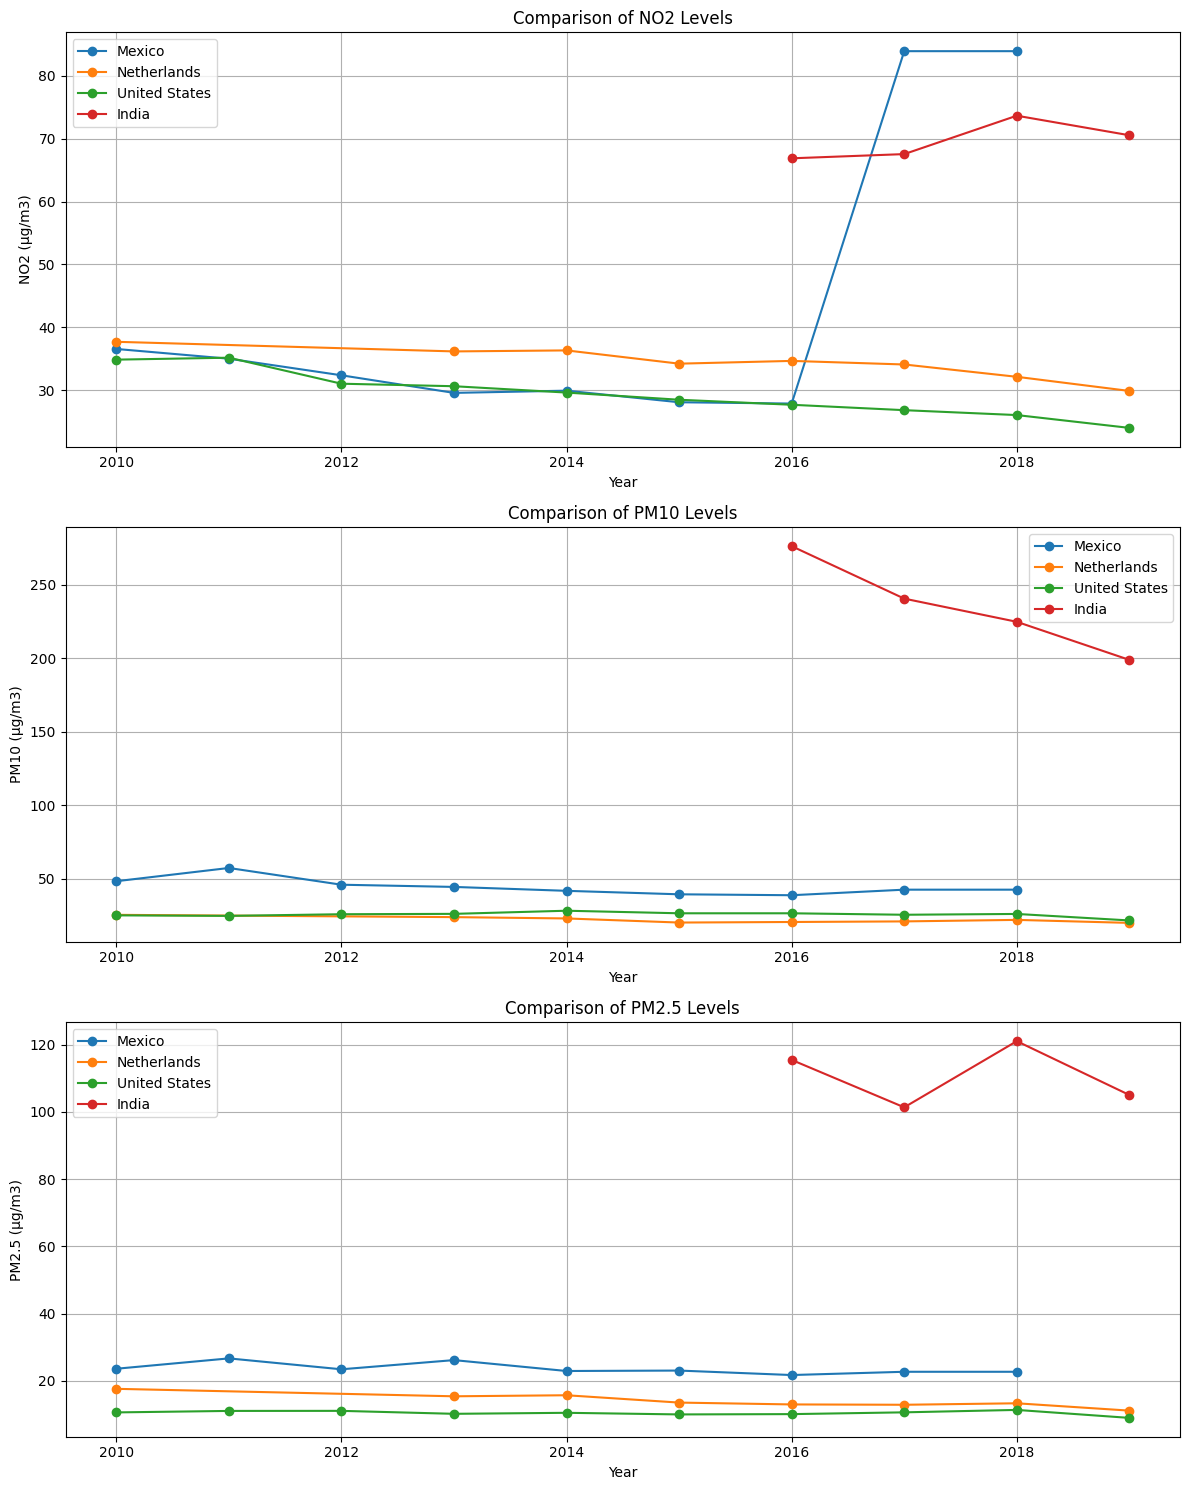

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt



# Mexico  Data
mexico_data = {

    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017 ,2018],
    'Deaths':[4843, 4631, 4335, 4066, 3785, 3496, 3217, 2996, 2870],
    'NO2': [36.55, 35, 32.36, 29.56, 29.91, 28.07, 27.86, 83.94, 83.94],
    'PM10': [48.25, 57.25, 45.87, 44.37, 41.71, 39.35, 38.72, 42.5, 42.5 ],
    'PM2.5': [23.6, 26.68, 23.44, 26.17, 22.93, 23.06, 21.73, 22.7, 22.7 ]
}
mexico_df = pd.DataFrame(mexico_data)

# Netherlands Data
netherlands_data = {
    'Year': [2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'Deaths': [14, 11, 10, 9, 9, 9, 9, 9],
    'NO2': [37.69, 36.16, 36.32, 34.21, 34.65, 34.08, 32.12, 29.87],
    'PM10': [25.39, 23.83, 22.93, 20.14, 20.52, 20.92, 21.95, 19.91],
    'PM2.5': [17.63, 15.41, 15.72, 13.54, 12.99, 12.89, 13.33, 11.15]
}
netherlands_df = pd.DataFrame(netherlands_data)

# United States Data
us_data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'Deaths': [664, 641, 620, 611, 607, 608, 601, 579, 553, 538],
    'NO2': [34.85, 35.16, 31.02, 30.62, 29.61, 28.47, 27.67, 26.81, 26.03, 23.99],
    'PM10': [25.03, 24.68, 25.8, 26.05, 28.18, 26.44, 26.44, 25.44, 25.99, 21.57],
    'PM2.5': [10.62, 11.06, 11.08, 10.2, 10.5, 10.02, 10.11, 10.64, 11.36, 8.99]
}
us_df = pd.DataFrame(us_data)

# India Data
india_data = {
    'Year': [2016, 2017, 2018, 2019],
    'Deaths': [164659, 146165, 137024, 128512],
    'NO2': [66.89, 67.56, 73.67, 70.56],
    'PM10': [276.11, 240.44, 224.67, 198.78],
    'PM2.5': [115.43, 101.33, 121, 105]
}
india_df = pd.DataFrame(india_data)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Plot NO2

axs[0].plot(mexico_df['Year'], mexico_df['NO2'], marker='o', label='Mexico')
axs[0].plot(netherlands_df['Year'], netherlands_df['NO2'], marker='o', label='Netherlands')
axs[0].plot(us_df['Year'], us_df['NO2'], marker='o', label='United States')
axs[0].plot(india_df['Year'], india_df['NO2'], marker='o', label='India')
axs[0].set_ylabel('NO2 (μg/m3)')
axs[0].set_title('Comparison of NO2 Levels')

# Plot PM10

axs[1].plot(mexico_df['Year'], mexico_df['PM10'], marker='o', label='Mexico')
axs[1].plot(netherlands_df['Year'], netherlands_df['PM10'], marker='o', label='Netherlands')
axs[1].plot(us_df['Year'], us_df['PM10'], marker='o', label='United States')
axs[1].plot(india_df['Year'], india_df['PM10'], marker='o', label='India')
axs[1].set_ylabel('PM10 (μg/m3)')
axs[1].set_title('Comparison of PM10 Levels')

# Plot PM2.5

axs[2].plot(mexico_df['Year'], mexico_df['PM2.5'], marker='o', label='Mexico')
axs[2].plot(netherlands_df['Year'], netherlands_df['PM2.5'], marker='o', label='Netherlands')
axs[2].plot(us_df['Year'], us_df['PM2.5'], marker='o', label='United States')
axs[2].plot(india_df['Year'], india_df['PM2.5'], marker='o', label='India')
axs[2].set_ylabel('PM2.5 (μg/m3)')
axs[2].set_title('Comparison of PM2.5 Levels')

# Customize the overall plot
for ax in axs:
    ax.set_xlabel('Year')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


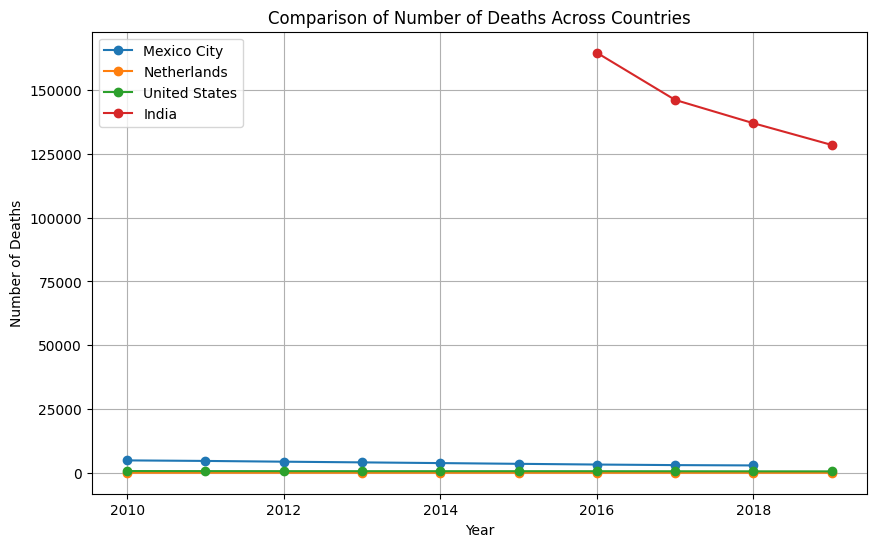

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Mexico City Data
mexico_city_data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017 ,2018],
    'Deaths':[4843, 4631, 4335, 4066, 3785, 3496, 3217, 2996, 2870],  # Replace None with actual values
    'NO2': [36.55, 35, 32.36, 29.56, 29.91, 28.07, 27.86, 83.94, 83.94],
    'PM10': [48.25, 57.25, 45.87, 44.37, 41.71, 39.35, 38.72, 42.5, 42.5 ],
    'PM2.5': [23.6, 26.68, 23.44, 26.17, 22.93, 23.06, 21.73, 22.7, 22.7 ]
}
mexico_city_df = pd.DataFrame(mexico_city_data)

# Netherlands Data
netherlands_data = {
    'Year': [2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'Deaths': [14, 11, 10, 9, 9, 9, 9, 9],
    'NO2': [37.69, 36.16, 36.32, 34.21, 34.65, 34.08, 32.12, 29.87],
    'PM10': [25.39, 23.83, 22.93, 20.14, 20.52, 20.92, 21.95, 19.91],
    'PM2.5': [17.63, 15.41, 15.72, 13.54, 12.99, 12.89, 13.33, 11.15]
}
netherlands_df = pd.DataFrame(netherlands_data)

# United States Data
us_data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'Deaths': [664, 641, 620, 611, 607, 608, 601, 579, 553, 538],
    'NO2': [34.85, 35.16, 31.02, 30.62, 29.61, 28.47, 27.67, 26.81, 26.03, 23.99],
    'PM10': [25.03, 24.68, 25.8, 26.05, 28.18, 26.44, 26.44, 25.44, 25.99, 21.57],
    'PM2.5': [10.62, 11.06, 11.08, 10.2, 10.5, 10.02, 10.11, 10.64, 11.36, 8.99]
}
us_df = pd.DataFrame(us_data)

# India Data (provided by the user)
india_data = {
    'Year': [2016, 2017, 2018, 2019],
    'Deaths': [164659, 146165, 137024, 128512],
    'NO2': [66.89, 67.56, 73.67, 70.56],
    'PM10': [276.11, 240.44, 224.67, 198.78],
    'PM2.5': [115.43, 101.33, 121, 105]
}
india_df = pd.DataFrame(india_data)

# Plotting
plt.figure(figsize=(10, 6))

# Plot Deaths
plt.plot(mexico_city_df['Year'], mexico_city_df['Deaths'], marker='o', label='Mexico City')
plt.plot(netherlands_df['Year'], netherlands_df['Deaths'], marker='o', label='Netherlands')
plt.plot(us_df['Year'], us_df['Deaths'], marker='o', label='United States')
plt.plot(india_df['Year'], india_df['Deaths'], marker='o', label='India')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Comparison of Number of Deaths Across Countries')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-2-debea29843ab>:22: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-2-debea29843ab>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')


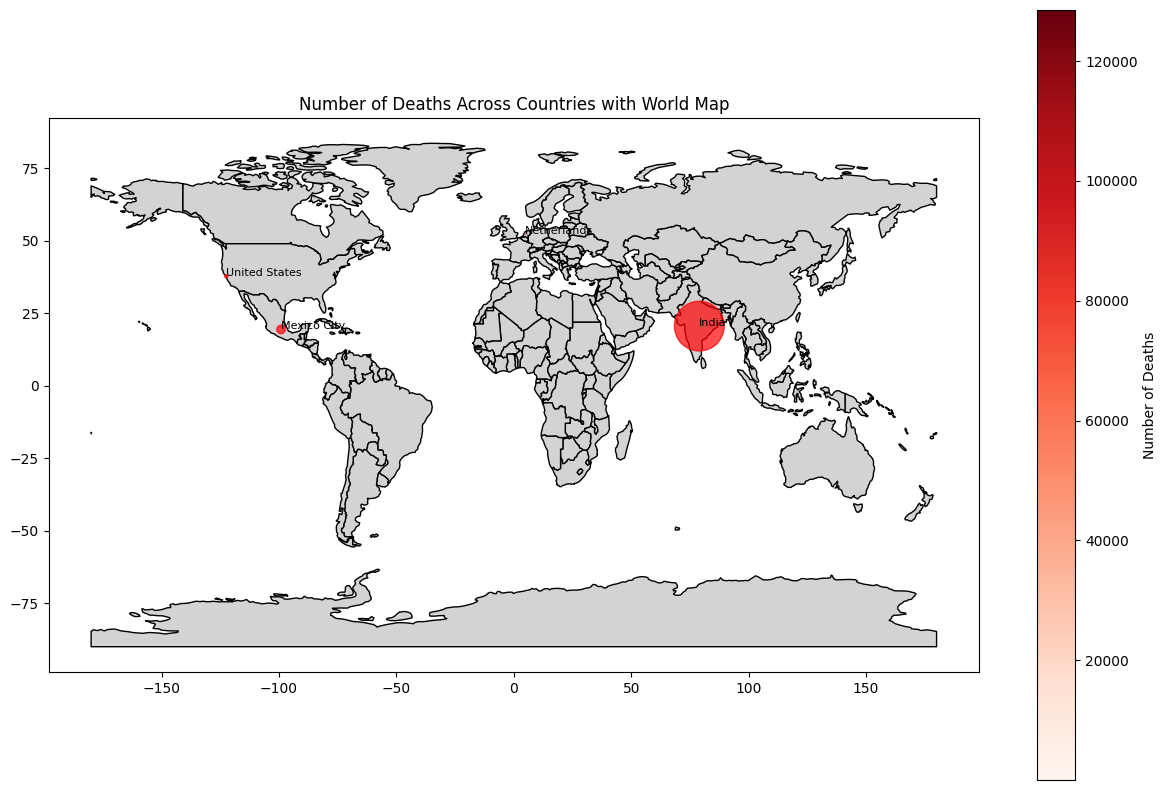

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Sample Data (Replace this with your actual DataFrame)
data = {
    'Country': ['Mexico City', 'Netherlands', 'United States', 'India'],
    'Deaths': [3758, 9, 538, 128512],
    'Latitude': [19.4326, 52.3676, 37.7749, 20.5937],  # Replace with actual coordinates
    'Longitude': [-99.1332, 4.9041, -122.4194, 78.9629]  # Replace with actual coordinates
}
df = pd.DataFrame(data)

# Create GeoDataFrame with Point geometries
geometry = [Point(lon, lat) for lon, lat in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, edgecolor='black', color='lightgray')

# Plot scatter points with colormap and larger markers based on the number of deaths
scatter = gdf.plot(
    ax=ax,
    marker='o',
    color='red',
    markersize=df['Deaths'].dropna() * 0.01,  # Adjust the scaling factor as needed
    alpha=0.7
)

# Add colorbar
cmap = cm.get_cmap('Reds')
normalize = Normalize(vmin=min(df['Deaths'].dropna()), vmax=max(df['Deaths'].dropna()))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm._A = []
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Number of Deaths')

# Add country names
for x, y, label in zip(df['Longitude'], df['Latitude'], df['Country']):
    ax.text(x, y, label, fontsize=8)

# Customize the plot
plt.title('Number of Deaths Across Countries with World Map')
plt.show()
